In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import os
os.chdir('work')

In [9]:
# importing datasets to python
train_df=pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [10]:
# viewing the 1st 5 observation of the train data
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# viewing the 1st 5 observation of the test data
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
# Dimensionality Check of Datasets
# the client provided two datasets, one with 4209 rows and 378 columns and the other with 4209 rows and 377 columns as initial data release
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (4209, 378)
Test shape :  (4209, 377)


### If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [13]:
#removing the categorical variables from datset as they will not be needed in the model
num_df = train_df.select_dtypes(exclude=['object'])

In [14]:
num_df.shape

(4209, 370)

In [15]:

zero_variance_df = num_df.loc[:, num_df.var() == 0.0]

In [16]:
zero_variance_df.shape

(4209, 12)

In [17]:
zero_variance_df.head()

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#  names of all constant features
zero_variance_df.columns

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [19]:
# there are 12 columns with zero variance (Constsnt features)
zero_variance_df.shape

(4209, 12)

In [20]:
# drping the constant features from dataset
train_df.drop(['X11','X93','X107','X233','X235','X268','X289','X290','X293','X297', 'X330','X347'],axis=1,inplace=True)

In [21]:
# after droping the features with zero variance we are left with 4209 rows and 366 in our train dataset

train_df.shape

(4209, 366)

## Check for null and unique values for test and train sets.

In [22]:
# able to note that there is no missing values for all the datasets (training and test)
train_df.isna().sum().sum()

0

In [23]:
test_df.isna().sum().sum()

0

In [24]:
# all the columns contain Unique values
train_df.columns.unique()

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=366)

## Preparing Data for Machine learning

In [25]:
# extracting ['y'] into an array (target array)
y_train = train_df['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [26]:
# Extracting only the coulumns need for machine learing for x_train
usable_columns = list(set(train_df.columns) - set(['ID', 'y']))

In [27]:
# creating x_train data
x_train = train_df[usable_columns]

In [28]:
# droping ['ID'] from test data as it is not neeeded for machine learning
test_df=test_df.drop('ID', axis=1)

In [29]:
# Extracting only the coulumns need for machine learing for x_test
x_test = test_df[usable_columns]

In [30]:
# Checking dimensionality of the split data set
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(4209, 364)
(4209,)
(4209, 364)


In [31]:
# creating function for checking missing values
def check_missing_values(df):
    if df.isnull().any().any():
        print('There are missing values in the dataframe')
    else:
            print('There are no missing values in the dataframe')

In [32]:
check_missing_values(x_train)
check_missing_values(x_test)

There are no missing values in the dataframe
There are no missing values in the dataframe


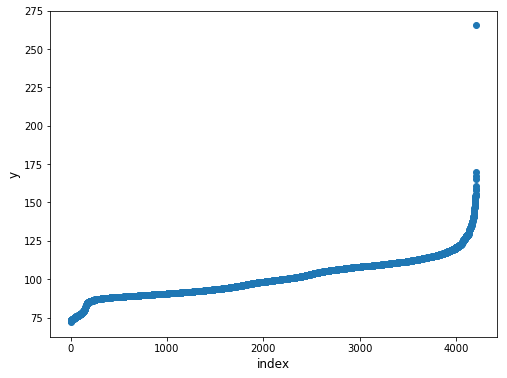

In [33]:
# "y" is the variable we need to predict. So we do some analysis on this variable first
# we are able to note that there is an outlier in y, that may affect our algorithim so it needs to be treated
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

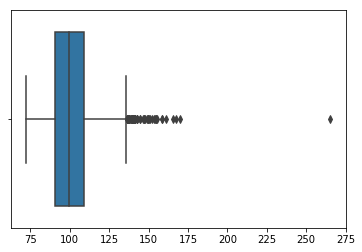

In [34]:
# checking ouliers with boxplot, this show more than one outlier, but we will aonly treat one
sns.boxplot(y_train)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


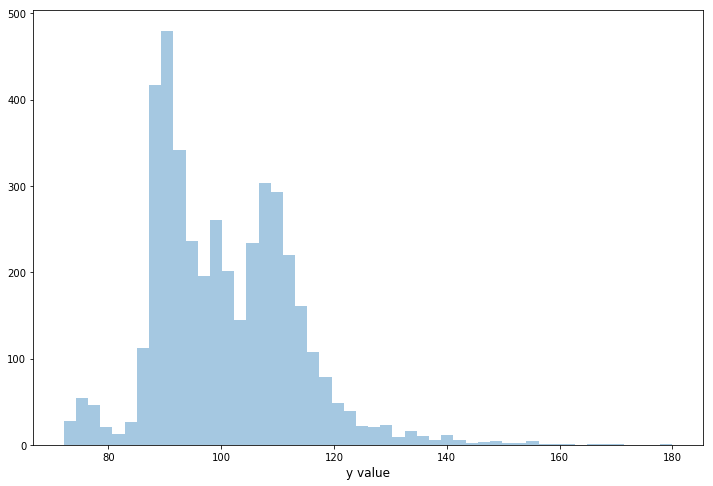

In [35]:
# ploting distribution graph of y before outlier removal
ulimit = 180
train_df['y'].ix[train_df['y']>ulimit] = ulimit

plt.figure(figsize=(12,8))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.show()

In [36]:
# treating the outliers in ['y'] 
y_train2 = train_df['y'].values <=175
y_train2

array([ True,  True,  True, ...,  True,  True,  True])

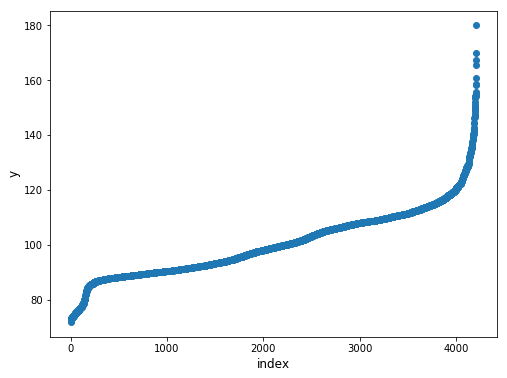

In [37]:
# checking if the outlier has been treated succesfull
# able to note that the outlier was removed from ['y']
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

## Apply label encoder.

In [38]:
#from this we are able to not that there are 8 columns which are of 'object type'
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X110 to X292
dtypes: int64(356), object(8)
memory usage: 11.7+ MB


In [39]:
# creating new names for my data, this is to aid in analysisi
a = x_train
b= x_test

In [40]:
# applying label encoder on x_train here named a
from sklearn import model_selection, preprocessing
for f in a.columns:
    if a[f].dtype =='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(a[f].values))
        a[f]= lbl.transform(list(a[f].values))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [41]:
# label encoder for x_test here named b
for f in b.columns:
    if b[f].dtype =='object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(b[f].values))
        b[f]= lbl.transform(list(b[f].values))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
# Checking to see if the categorical variables have been changed to numeric
# able to note that there are no categorical variables anymore on the x_train and X_test
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X110 to X292
dtypes: int64(364)
memory usage: 11.7 MB


In [43]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 364 entries, X110 to X292
dtypes: int64(364)
memory usage: 11.7 MB


## Performing dimensionality reduction.

In [44]:
from sklearn.decomposition import PCA

In [45]:
# initiating model
model = PCA(n_components=15)

In [46]:
# fiting X_train to model, 
model.fit(a)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [47]:
# transforming data to 15 dimensions or components
transformed_x_train = model.transform(a)

In [48]:
transformed_x_train.shape

(4209, 15)

In [49]:
# printing the amount of variation (ration) that is explained by each PCA components
print("Explained variance: ", model.explained_variance_ratio_)

Explained variance:  [0.38334782 0.21388033 0.13261866 0.11826642 0.09206008 0.01590604
 0.0074454  0.00433701 0.00294021 0.00241796 0.00236488 0.00203229
 0.00167204 0.00148111 0.00128702]


In [ ]:
# from the above code we see that over 92.2% of total variation in the data is explained by the 1st 5 PCA component.
# we could have limited n_components to 5 it would have been fine.
# [38.3%, 21.3%, 13.2%, 11.8%, 9.2%]

In [51]:
# ploting these PCA componets and the ammount of variation they explain
# creating dataframe for ploting
df_var = pd.DataFrame({'Variance': model.explained_variance_ratio_,
                      'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15']})
df_var


,Variance,PC
0,0.383348,PC1
1,0.213880,PC2
2,0.132619,PC3
3,0.118266,PC4
4,0.092060,PC5
5,0.015906,PC6
6,0.007445,PC7
7,0.004337,PC8
8,0.002940,PC9
9,0.002418,PC10


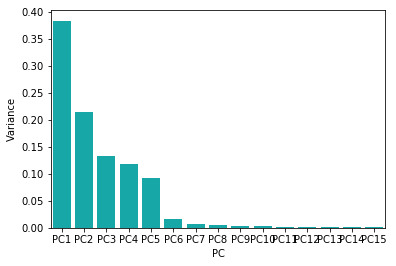

In [52]:
sns.barplot(x='PC',y='Variance', data= df_var, color='c')

In [53]:
# PCA on test Data [Transforming the test Data]
model.fit(b)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [54]:
# transforming data to 15 dimensions or components
transformed_x_test = model.transform(b)
transformed_x_test.shape

(4209, 15)

## Random forest Classifier, because this is a regression problem



In [55]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier()

In [56]:
# Fiting training data to the classifier model 

model2.fit(transformed_x_train,y_train2)



/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
# evaluating the accuracy of the model,
#the model is 99% accurate

model2.score(transformed_x_test,y_train2)

0.9997624138750297

## Predicting test_df values using XGBoost

In [58]:
import xgboost as xgb

In [59]:
xgb_classifier= xgb.XGBClassifier()

In [60]:
# fiting data into xgb model predictor
xgb_classifier.fit(transformed_x_train,y_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [61]:
predictions = xgb_classifier.predict(transformed_x_test)
predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
print('accuracy of model::',accuracy_score(y_train2,predictions))

accuracy of model:: 0.9997624138750297


In [ ]:
# The accuracy of both models didnot differ, they both gave the same acccuracy.